In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [57]:
hour_df = pd.read_csv(r'C:\Users\jyoti\Desktop\DATA SCIENCE\Capital Bike Sharing\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


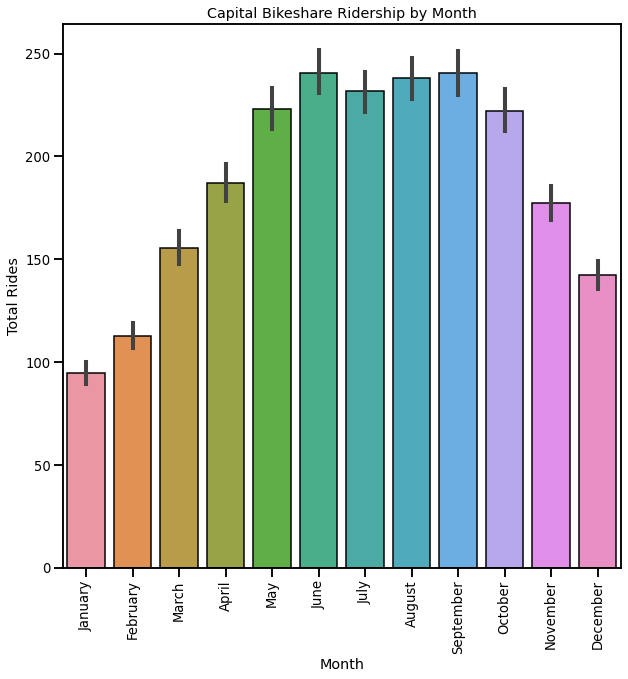

In [58]:
fig, ax = plt.subplots()
sns.barplot(data=hour_df[['mnth','cnt']], x='mnth', y='cnt', ax=ax, edgecolor='black')

plt.title('Capital Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab, rotation=90)

plt.show()

In [59]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [60]:
#rename columns
hour_df = hour_df.rename(columns={'dteday':'datetime',
                        'yr':'year',
                        'mnth':'month',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'cnt':'total_rides'})

#set categorical variables
##why set as categories??
hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weather'] = hour_df['weather'].astype('category')

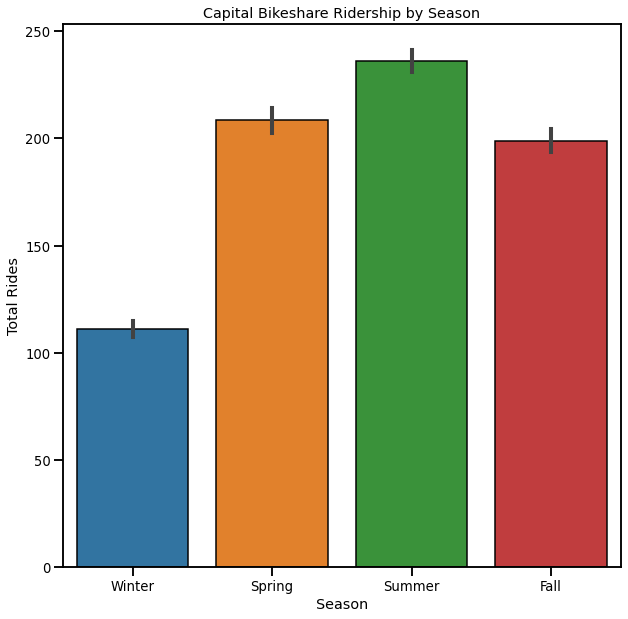

In [61]:
fig, ax = plt.subplots()
sns.barplot(data=hour_df[['season','total_rides']],
            x='season',
            y='total_rides',
            ax=ax,
            edgecolor = 'black')

plt.title('Capital Bikeshare Ridership by Season')
plt.ylabel('Total Rides')
plt.xlabel('Season')

tick_val=[0, 1, 2, 3]
tick_lab=['Winter', 'Spring', 'Summer', 'Fall']
plt.xticks(tick_val, tick_lab)

plt.show()

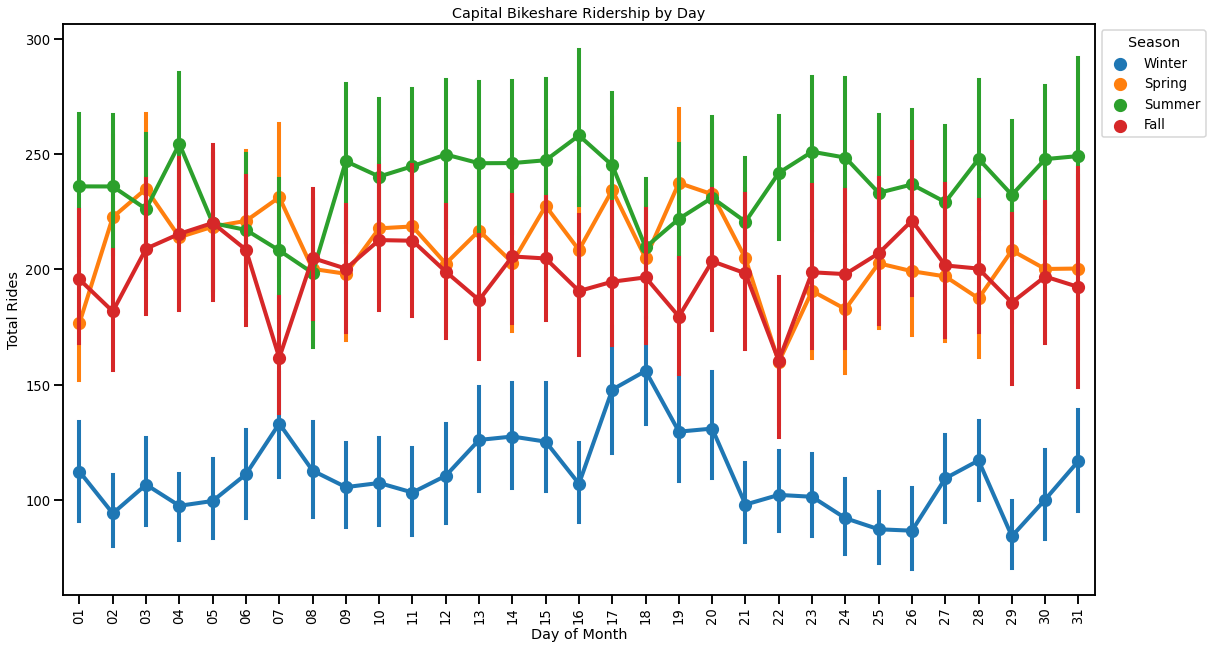

In [62]:
hour_df['day_of_month'] = hour_df.datetime.str[-2:]
hour_df.head()

fig, ax = plt.subplots()
sns.pointplot(data=hour_df[['day_of_month', 'total_rides', 'season']],
              x='day_of_month',
              y='total_rides',
              hue='season',
              ax=ax)

plt.title('Capital Bikeshare Ridership by Day')
plt.ylabel('Total Rides')
plt.xlabel('Day of Month')
plt.xticks(rotation=90)
fig.set_size_inches(18.5, 10.5)

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Winter', 'Spring', 'Summer', 'Fall'], title='Season', bbox_to_anchor=(1, 1), loc=2)

plt.show()

Text(0.5, 0, 'Month')

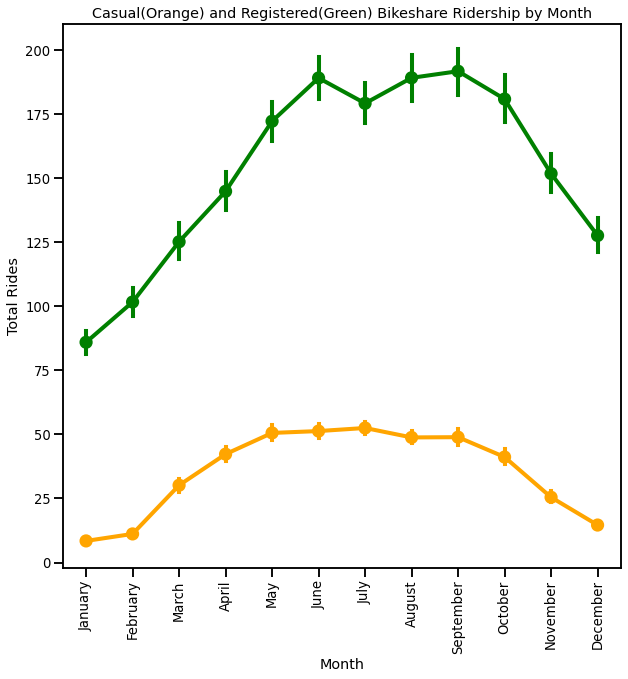

In [63]:
fig, ax = plt.subplots()
sns.pointplot(data=hour_df[['month', 'casual', 'registered']],
              x='month',
              y='casual',
              ax=ax,
              color='orange')

sns.pointplot(data=hour_df[['month', 'casual', 'registered']],
              x='month',
              y='registered',
              ax=ax,
              color='green')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab, rotation=90)

plt.title('Casual(Orange) and Registered(Green) Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')